In [1]:
import pandas as pd
# Load the dataset
taxi_data = pd.read_csv(r'E:\Python\New folder\TaxiFare.csv')
# Display the first few rows of the dataset
taxi_data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [2]:
# Check for missing values in the dataset
missing_values = taxi_data.isnull().sum()
missing_values

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

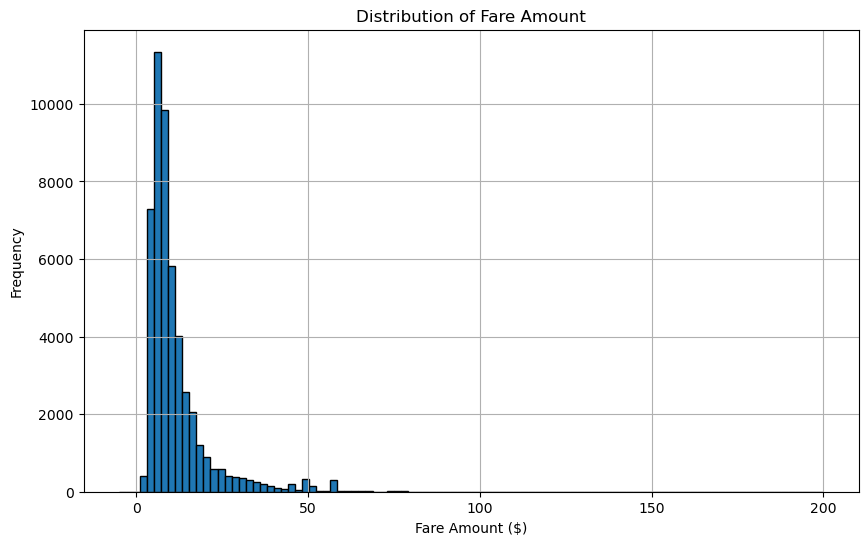

In [3]:
import matplotlib.pyplot as plt
# Plot the distribution of the 'amount' column
plt.figure(figsize=(10, 6))
plt.hist(taxi_data['amount'], bins=100, edgecolor='k')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [4]:
# Filter the dataset for rows where the fare amount is greater than $100
high_fares = taxi_data[taxi_data['amount'] > 100]
high_fares.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000
mean,139.756875,-69.225953,38.267570,-69.228812,38.320751,1.50000
std,28.490658,18.462011,10.206673,18.462786,10.221068,1.21106
min,103.000000,-74.429332,0.000000,-74.429332,0.000000,1.00000
25%,117.500000,-73.988409,40.723894,-73.989742,40.737210,1.00000
50%,135.500000,-73.860855,40.755950,-73.857810,40.775776,1.00000
75%,161.250000,-73.641737,40.823976,-73.639324,41.023610,1.00000
max,200.000000,0.000000,41.391042,0.000000,41.391042,5.00000


In [5]:
# Filter the high_fares dataset for rows where either latitude or longitude values are 0
erroneous_data = high_fares[(high_fares['latitude_of_pickup'] == 0) | 
                            (high_fares['longitude_of_pickup'] == 0) | 
                            (high_fares['latitude_of_dropoff'] == 0) | 
                            (high_fares['longitude_of_dropoff'] == 0)]
erroneous_data

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
6630,51:00.0,128.83,2014-05-16 01:51:00 UTC,0.0,0.0,0.0,0.0,1


In [6]:
# Remove the erroneous data from the main dataset
taxi_data_cleaned = taxi_data.drop(erroneous_data.index)
# Confirm the removal
len(taxi_data) - len(taxi_data_cleaned)

1

In [7]:
import numpy as np
def haversine_distance(lon1, lat1, lon2, lat2):
#Calculate the Haversine distance between two points on the earth specified by latitude and longitude.
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])    
    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
    r = 6371 # Radius of Earth in kilometers
    distance = r * c
    return distance
#Compute the distance for each row in the dataset
taxi_data_cleaned['distance'] = haversine_distance(taxi_data_cleaned['longitude_of_pickup'], 
                                                   taxi_data_cleaned['latitude_of_pickup'], 
                                                   taxi_data_cleaned['longitude_of_dropoff'], 
                                                   taxi_data_cleaned['latitude_of_dropoff'])
# Display the first few rows with the new distance feature
taxi_data_cleaned.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [8]:
# Convert the 'date_time_of_pickup' column to datetime format
taxi_data_cleaned['date_time_of_pickup'] = pd.to_datetime(taxi_data_cleaned['date_time_of_pickup'])
# Extract features from the 'date_time_of_pickup' column
taxi_data_cleaned['hour_of_pickup'] = taxi_data_cleaned['date_time_of_pickup'].dt.hour
taxi_data_cleaned['day_of_week'] = taxi_data_cleaned['date_time_of_pickup'].dt.dayofweek
taxi_data_cleaned['month'] = taxi_data_cleaned['date_time_of_pickup'].dt.month
# Display the first few rows with the new features
taxi_data_cleaned[['date_time_of_pickup', 'hour_of_pickup', 'day_of_week', 'month']].head()

,date_time_of_pickup,hour_of_pickup,day_of_week,month
0,2009-06-15 17:26:21+00:00,17,0,6
1,2010-01-05 16:52:16+00:00,16,1,1
2,2011-08-18 00:35:00+00:00,0,3,8
3,2012-04-21 04:30:42+00:00,4,5,4
4,2010-03-09 07:51:00+00:00,7,1,3


In [9]:
from sklearn.model_selection import train_test_split
# Define the features and target variable
X = taxi_data_cleaned[['longitude_of_pickup', 'latitude_of_pickup', 
                       'longitude_of_dropoff', 'latitude_of_dropoff', 
                       'no_of_passenger', 'distance', 'hour_of_pickup', 
                       'day_of_week', 'month']]
y = taxi_data_cleaned['amount']
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((39999, 9), (10000, 9))

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Dictionary to store results
results = {}

# List of regression models to evaluate
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train each model and evaluate on test set
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = (rmse, mae)

results

{'Linear Regression': (9.513757998297976, 5.9840622526362175),
 'Ridge Regression': (9.513757929237439, 5.984062183385498),
 'Lasso Regression': (9.52038232943459, 5.9888835768814745),
 'Decision Tree Regressor': (6.389799615706966, 3.1119606666666666),
 'Random Forest Regressor': (4.701174366989718, 2.2678751442460316)}